47
[400, 390, 380, 370, 360, 350, 340, 330, 320, 310, 300, 290, 280, 270, 260, 250, 240, 230, 220, 210, 200, 190, 180, 170, 160, 150, 140, 130, 120, 110, 100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20]
(47, 5)
(47, 5)


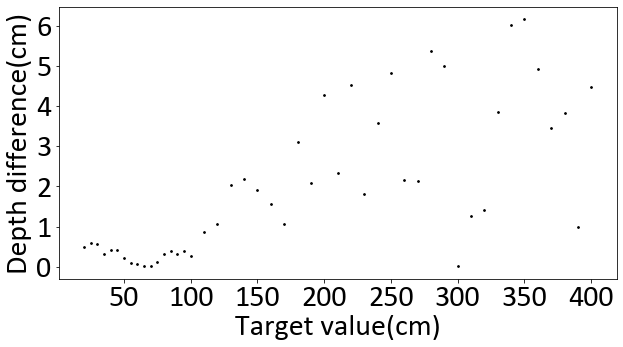

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def read_data(file_path):
    raw_data = []
    measure_data = []
    target_data = [i for i in range(20, 101, 5)]
    target_data.extend([i for i in range(110, 401, 10)])
    target_data.reverse()
    with open(file_path, "r") as file:
        data = file.read().split("\n\n")
        for item in data:
            element = item.split("\n")
            element[0] = element[0][1:-1]
            scatter = element[0].split(",")
            raw_data.append(scatter)
            measure_data.append(element[1])
            # break
        measure_data = np.array(measure_data, dtype=np.float32)
        measure_data = measure_data * 100
        # print("Current Measure Data :", measure_data)
        raw_data = np.array(raw_data, dtype=np.float32)
        raw_data *= 100
        return target_data, raw_data, measure_data


target, raw, mean = read_data(r"C:\Users\jiant\Desktop\data\hardware-depth-measure\1019_data.txt")
index = np.arange(0, 100)
np.random.shuffle(index)
index = index[0:5]
slice = 400  #调整X轴最大值
target_np_array = np.array(target)
length = np.sum(target_np_array <= slice)
print(length)
target_np_array = target_np_array[target_np_array.shape[0] - length:]
target = list(target_np_array)
print(target)
target_np_array = np.array(target * 5).reshape(-1, len(target)).T
shrink_raw_data = raw[-length:][:, index]
print(shrink_raw_data.shape)
print(target_np_array.shape)
target_np_array.flatten()
shrink_raw_data.flatten()
plt.rcParams['figure.figsize'] = (10, 5)  # 单位是inches
# plt.scatter(target_np_array,shrink_raw_data-target_np_array,color='#d62728',marker="x")
plt.scatter(np.array(target), np.fabs(mean[mean.shape[0] - length:] - np.array(target)), c="black", marker="o", s=3)
# plt.scatter(np.array(target),mean[mean.shape[0]-length:],c="red",marker="x")
x_min = np.array(target).min()
x_max = np.array(target).max()
plt.xticks(fontproperties='Calibri', size=30)
plt.yticks(fontproperties='Calibri', size=30)
plt.ylabel("Depth difference(cm)", fontdict={'family': 'Calibri', 'size': 30})
plt.xlabel("Target value(cm)", fontdict={'family': 'Calibri', 'size': 30})
# plt.title(f"align RGB-D depth estimation", fontdict={'family': 'Calibri', 'size': 30})
# plt.ylabel("Actual value(cm)")
plt.show()